## Projet6: Classifiez automatiquement des biens de consommation

## Contexte <br>
Sur la place de marché, des vendeurs proposent des articles à des acheteurs en postant une photo et une description.<br>

Pour l'instant, l'attribution de la catégorie d'un article est effectuée manuellement par les vendeurs et est donc peu fiable. De plus, le volume des articles est pour l’instant très petit.<br>

Pour rendre l’expérience utilisateur des vendeurs (faciliter la mise en ligne de nouveaux articles) et des acheteurs (faciliter la recherche de produits) la plus fluide possible et dans l'optique d'un passage à l'échelle, il devient nécessaire d'automatiser cette tâche.<br>

Linda, lead data scientist, vous demande donc d'étudier la faisabilité d'un moteur de classification des articles en différentes catégories, avec un niveau de précision suffisant.

Votre mission est de réaliser une première étude de faisabilité d'un moteur de classification d'articles basé sur une image et une description pour l'automatisation de l'attribution de la catégorie de l'article.

Vous analyserez le jeu de données en réalisant un prétraitement des images et des descriptions des produits, une réduction de dimension, puis un clustering. Les résultats du clustering seront présentés sous la forme d’une représentation en deux dimensions à déterminer, qui ’illustrera le fait que les caractéristiques extraites permettent de regrouper des produits de même catégorie.

1-Importer les données textuelles

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv(r'C:\Users\ROUA\OneDrive\Bureau\openclassrooms\P6\Dataset+projet+prétraitement+textes+images\Flipkart\flipkart_com-ecommerce_sample_1050.csv')

In [3]:
#discovering data
data.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."


Stratégie à suivre:
 1-Les champs de texte sont nettoyés (retirer la ponctuation, les mots de liaison, mettre tout en minuscule) <br>
 2-Une fonction permettant de “tokeniser” une phrase a été écrite et fonctionne correctement <br>
 3-Une fonction permettant de “stemmer” une phrase a été écrite et fonctionne correctement <br>
 4-Une fonction permettant de “lemmatiser” une phrase a été écrite et fonctionne correctement <br>
 5-Des features bag-of-word sont construites (avec étapes de nettoyage supplémentaires : seuil de fréquence des mots, normalisation des mots (racines, utilisation du package NLTK)) <br>
 *Une phrase (ou un court texte) d'exemple permet d'illustrer et de tester la bonne réalisation des 5 étapes précédentes

In [129]:
data.dtypes

uniq_id                                 object
crawl_timestamp            datetime64[ns, UTC]
product_url                             object
product_name                            object
product_category_tree                   object
pid                                     object
retail_price                           float64
discounted_price                       float64
image                                   object
is_FK_Advantage_product                   bool
description                             object
product_rating                          object
overall_rating                          object
brand                                   object
product_specifications                  object
main_category                           object
dtype: object

In [128]:
data.crawl_timestamp = pd.to_datetime(data.crawl_timestamp)

In [130]:
data.shape

(1050, 16)

In [6]:
data.isnull().sum()

uniq_id                      0
crawl_timestamp              0
product_url                  0
product_name                 0
product_category_tree        0
pid                          0
retail_price                 1
discounted_price             1
image                        0
is_FK_Advantage_product      0
description                  0
product_rating               0
overall_rating               0
brand                      338
product_specifications       1
dtype: int64

In [125]:
#feature engineering extract main category from product_category_tree
def extract_main_category(sentence):
    
    s =sentence.split('>>')[0]
    s = ''.join(ch for ch in s if ch.isalnum())
    return s
data['main_category'] =data.product_category_tree.apply(lambda tree: extract_main_category(tree))


In [126]:
data.main_category

0       HomeFurnishing
1             BabyCare
2             BabyCare
3       HomeFurnishing
4       HomeFurnishing
             ...      
1045          BabyCare
1046          BabyCare
1047          BabyCare
1048          BabyCare
1049          BabyCare
Name: main_category, Length: 1050, dtype: object

<AxesSubplot:ylabel='main_category'>

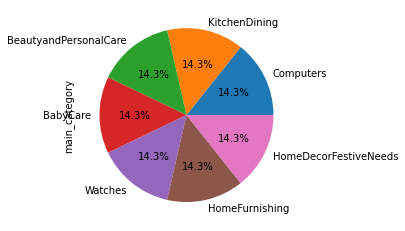

In [127]:
data.main_category.value_counts().plot(kind='pie',autopct='%1.1f%%')

Les distribution des catégories est équitable.

**EDA

In [131]:
data.describe()

,retail_price,discounted_price
count,1049.000000,1049.000000
mean,2186.197331,1584.527169
std,7639.229411,7475.099680
min,35.000000,35.000000
25%,555.000000,340.000000
50%,999.000000,600.000000
75%,1999.000000,1199.000000
max,201000.000000,201000.000000


In [132]:
data.crawl_timestamp.describe()

<ipython-input-132-f9a49afea239>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.crawl_timestamp.describe()


count                          1050
unique                          149
top       2015-12-01 12:40:44+00:00
freq                            150
first     2015-12-01 06:13:00+00:00
last      2016-06-26 14:21:24+00:00
Name: crawl_timestamp, dtype: object

In [133]:
data['month'] = data['crawl_timestamp'].dt.month

<AxesSubplot:xlabel='month'>

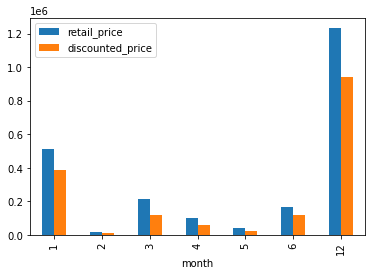

In [138]:
data[['retail_price','discounted_price','month']].groupby('month').sum().plot(kind='bar')

Les plus des ventes ont eu lieu le mois de décembre.

<AxesSubplot:xlabel='main_category'>

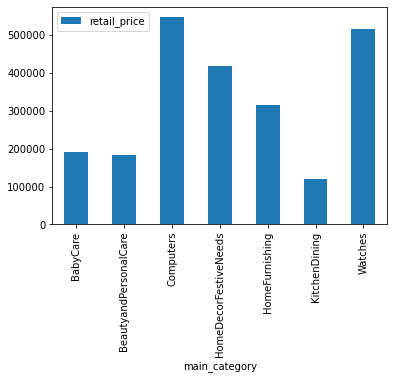

In [140]:
data[['retail_price','main_category']].groupby('main_category').sum().plot(kind='bar')

Les catégories les plus vendues sont les ordinateurs puis les montres.

<AxesSubplot:xlabel='main_category'>

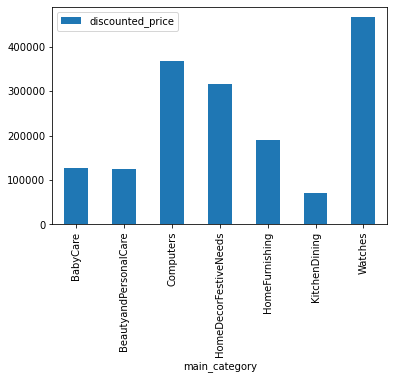

In [141]:
data[['discounted_price','main_category']].groupby('main_category').sum().plot(kind='bar')

Les meilleures réductions ont touchés la catéorie des montres.

<AxesSubplot:xlabel='month'>

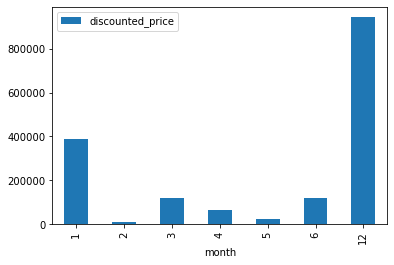

In [142]:
data[['discounted_price','month']].groupby('month').sum().plot(kind='bar')

Des importantes réductions ont eu lieu le mois de décembre (2015) ce qui justifie le grand nombre de vente pendant ce mois.

**Prétraitement de texte

In [29]:
textual_data=data[['product_url','product_name','product_category_tree','description','brand','product_specifications']]

In [54]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ROUA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ROUA\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [33]:
import nltk
test = textual_data['description']
test.dropna(inplace=True)

test["tokens"] = test.apply(nltk.word_tokenize)
test["tokens"] = [w.lower() for w in test["tokens"]]


<ipython-input-33-730f54354da8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.dropna(inplace=True)
<ipython-input-33-730f54354da8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["tokens"] = test.apply(nltk.word_tokenize)


'    text = nltk.Text(tokens)\n    words = [w.lower() for w in text]'

In [64]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [91]:
import re
from nltk import word_tokenize
def custom_tokenizer(sentence):
    #deleting numbers from sentence
    pattern = r'[0-9]'
    sentence = re.sub(pattern, '', sentence)
    #splitting to words
    words = word_tokenize(sentence.lower())
    #delete punctuations
    sentence =[word.strip(string.punctuation) for word in words]
    #transforming words to lower case
    sentence = [w.lower() for w in sentence]
    #deleting english stop words
    filtered_sentence = [w for w in sentence if not w in stop_words]

    return ' '.join(filtered_sentence)
    

In [92]:
custom_tokenizer('Hello ,!People HHH a about be 2????++* after first')

'hello   people hhh       first'

In [93]:
from nltk.stem.snowball import SnowballStemmer
def custom_stemmer(sentence):
    s_stemmer = SnowballStemmer(language='english')
    words = word_tokenize(sentence.lower())
    stemmed_words=[]
    for w in words:
        stemmed_words.append(s_stemmer.stem(w))
        
    return ' '.join(stemmed_words)

In [94]:
custom_stemmer('program programming programs programmer')

'program program program programm'

In [97]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet') 
lemma =WordNetLemmatizer()
def custom_lemmatization(sentence):
    tokens = word_tokenize(sentence.lower())#split different then  word_tokenize 
    tokens = [lemma.lemmatize(lemma.lemmatize(lemma.lemmatize(w,'v'),'n'),'a') for w in tokens]
    return ' '.join(tokens)
#df['Content'] =df.Content.apply(lambda sent: lemmatize(sent))


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ROUA\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


In [100]:
custom_lemmatization('Hello ,!friends HHH a about be 2????++* after first brought kept away')

'hello , ! friend hhh a about be 2 ? ? ? ? ++ * after first bring keep away'

In [68]:
data.product_category_tree[0]

'["Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do..."]'

In [101]:
#bag of words using sklearn
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
 
sentence_1="This is a good job.I will not miss it for anything"
sentence_2="This is not good at all"
 
 
 
CountVec = CountVectorizer(ngram_range=(1,1), # to use bigrams ngram_range=(2,2)
                           stop_words='english')
#transform
Count_data = CountVec.fit_transform([sentence_1,sentence_2])
 
#create dataframe
cv_dataframe=pd.DataFrame(Count_data.toarray(),columns=CountVec.get_feature_names())
print(cv_dataframe)

   good  job  miss
0     1    1     1
1     1    0     0
